*[Notebook is based on the code from the chapter 4 of the book](https://colab.research.google.com/github/fastai/fastbook/blob/master/04_mnist_basics.ipynb)*  
Text from the book is omitted in this notebook. Please the link ☝ to read the book's content.

In [1]:
import fastbook
fastbook.setup_book()

from fastai.vision.all import *
from fastbook import *

Load MNIST

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
print(path)
print(path.ls())

C:\Users\User\.fastai\data\mnist_sample
[Path('C:/Users/User/.fastai/data/mnist_sample/labels.csv'), Path('C:/Users/User/.fastai/data/mnist_sample/train'), Path('C:/Users/User/.fastai/data/mnist_sample/valid')]


Threes and sevens

In [3]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
print(threes[:5]) # Paths to first 5 threes
print(sevens[:5]) # Paths to first 5 sevens

[Path('C:/Users/User/.fastai/data/mnist_sample/train/3/10.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/3/10000.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/3/10011.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/3/10031.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/3/10034.png')]
[Path('C:/Users/User/.fastai/data/mnist_sample/train/7/10002.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/7/1001.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/7/10014.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/7/10019.png'), Path('C:/Users/User/.fastai/data/mnist_sample/train/7/10039.png')]


Example

In [4]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

Image as an array

In [5]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

Image as a tensor

In [6]:
tensor(im3)[4:25,4:22]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0],
        [  0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 233,   0,   0,   0],
        [  0,  93, 244, 249, 253, 187,  46,  10,   8,   4,  10, 194, 253, 253, 233,   0,   0,   0],
        [  0, 107, 253, 253, 230,  48,   0,   0,   0,   0,   0, 192, 253, 253, 156,   0,   0,   0],
        [  0,   3,  20,  20,  15,   0,   0,   0,   0,   0,  43, 224, 253, 245,  74,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 245, 126,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  14, 101, 223, 253, 248, 124,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  11, 166, 239, 253, 253, 253, 187,  30,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  16, 248, 250, 253, 253, 253, 253, 232, 213, 111,   2,   0,   0],


Image as a table

In [7]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:25,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


Pixel Similarity

In [8]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

<Axes: >

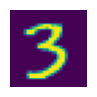

In [9]:
show_image(three_tensors[1])

Stacking up images

In [10]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [11]:
len(stacked_threes.shape) # Tensor's rank!

3

Pictures' means

<Axes: >

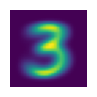

In [12]:
mean3 = stacked_threes.mean(0)
show_image(mean3)

<Axes: >

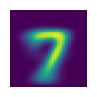

In [13]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

<Axes: >

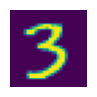

In [14]:
a_3 = stacked_threes[1]
show_image(a_3)

Measuring distance

In [15]:
# Mean absolute difference or L1 norm
dist_3_abs = (a_3 - mean3).abs().mean()

# Root mean squared error (RMSE) or L2 norm.
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
print((dist_3_abs,dist_3_sqr))

dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
print((dist_7_abs,dist_7_sqr))

(tensor(0.1114), tensor(0.2021))
(tensor(0.1586), tensor(0.3021))


In [16]:
# Calc means using PyTorch

F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

NumPy arrays and PyTorch tensors

In [17]:
data = [[1,2,3],[4,5,6]]
arr = array (data)
tns = tensor(data)

print(arr) # numpy
print(tns) # pytorch

[[1 2 3]
 [4 5 6]]
tensor([[1, 2, 3],
        [4, 5, 6]])


In [18]:
tns[1]

tensor([4, 5, 6])

In [19]:
tns[:,1]

tensor([2, 5])

In [20]:
tns[1,1:3] # on the second row select elems between the second and the forth elemes

tensor([5, 6])

In [21]:
tns+1

tensor([[2, 3, 4],
        [5, 6, 7]])

In [22]:
tns*1.5

tensor([[1.5000, 3.0000, 4.5000],
        [6.0000, 7.5000, 9.0000]])

Computing Metrics Using Broadcasting


In [23]:
valid_threes = (path/'valid'/'3').ls()
valid_threes_tensor = [tensor(Image.open(o)) for o in valid_threes]
valid_threes_stack = torch.stack(valid_threes_tensor)
valid_threes_norm = valid_threes_stack.float()/255

valid_sevens = (path/'valid'/'7').ls().sorted()
valid_sevens_tensor = [tensor(Image.open(o)) for o in valid_sevens]
valid_sevens_stack = torch.stack(valid_sevens_tensor)
valid_sevens_norm = valid_sevens_stack.float()/255

valid_threes_norm.shape,valid_sevens_norm.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [24]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

# distance between the example pic `a_3` and the mean picture `mean3`
print(mnist_distance(a_3, mean3))

# distance between each picture in the `valid_threes_norm` tensor and the mean picture `mean3`
# See PyTorch broadcasting for more details
valid_threes_dist = mnist_distance(valid_threes_norm, mean3)
valid_threes_dist, valid_threes_dist.shape


tensor(0.1114)


(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [25]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [26]:
is_3(valid_threes_norm)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [27]:
accuracy_3s =      is_3(valid_threes_norm).float() .mean()
accuracy_7s = (1 - is_3(valid_sevens_norm).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

Stochastic Gradient Descent (SGD)

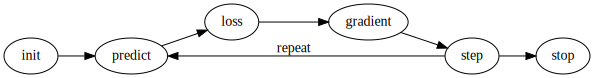

In [28]:
gv('''
init->predict->loss->gradient->step->stop
step->predict[label=repeat]
''')

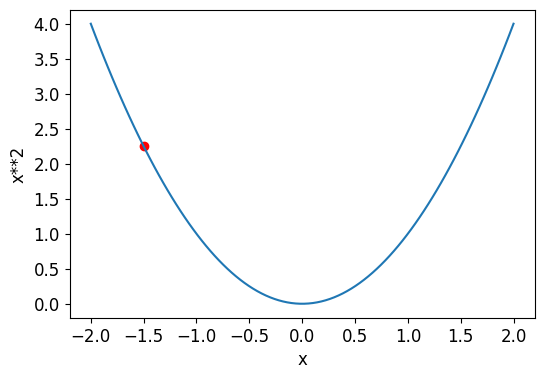

In [29]:
def f(x): return x**2
plot_function(f, "x", "x**2")
plt.scatter(-1.5, f(-1.5), color='red')

In [30]:
xt = tensor(3.).requires_grad_() # request gradient calculation for the tensor
yt = f(xt) # use the tensor and the func to calc a 'y' value
print(yt)

yt.backward() # calculate gradient for the f(..) function
print(xt.grad)

tensor(9., grad_fn=<PowBackward0>)
tensor(6.)


tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])


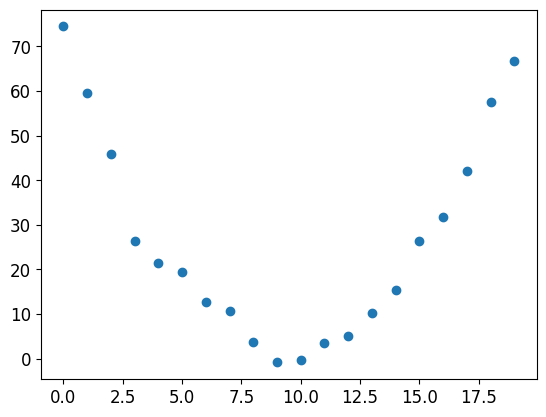

In [31]:
time = torch.arange(0,20).float()
print(time)
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

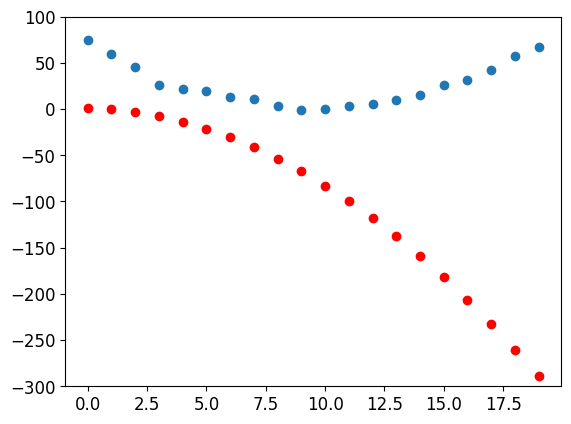

In [32]:
def f(x, params):
    a,b,c = params
    return a*(x**2) + (b*x) + c

def mse(preds, targets):
    return ((preds-targets)**2).mean()

params = torch.randn(3).requires_grad_()
orig_params = params.clone()
preds = f(time, params)

def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)

show_preds(preds)

In [33]:
loss = mse(preds, speed)
loss.backward()
gradients = params.grad
print(gradients)
print(gradients * 1e-5)

tensor([-53195.8633,  -3419.7148,   -253.8908])
tensor([-0.5320, -0.0342, -0.0025])


In [34]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [35]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [36]:
preds = f(time,params)
mse(preds, speed)

tensor(5435.5356, grad_fn=<MeanBackward0>)

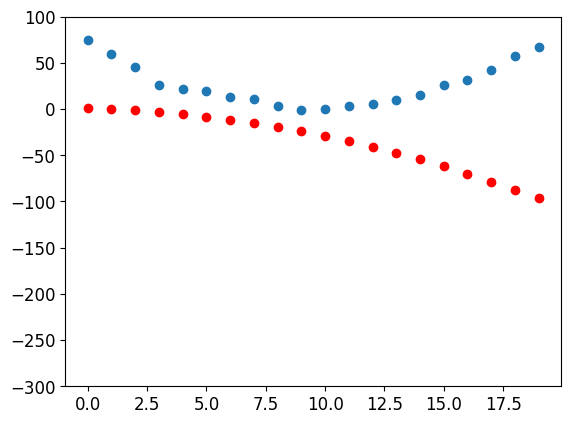

In [37]:
show_preds(preds)

In [38]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [39]:
for i in range(10): apply_step(params)

5435.53564453125
1577.44921875
847.3778076171875
709.2225341796875
683.0758056640625
678.1243896484375
677.1838989257812
677.0023803710938
676.9645385742188
676.9537353515625


Plot loss func step by step

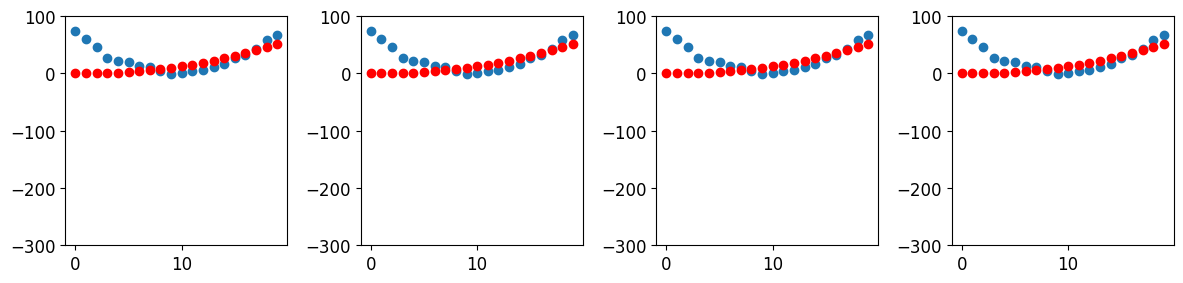

In [40]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

In [44]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
print((train_x.shape,train_y.shape))

dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([12396, 784]), torch.Size([12396, 1]))


(torch.Size([784]), tensor([1]))

In [46]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28,1))
bias = init_params(1)

Prediction to one image

In [47]:
(train_x[0]*weights.T).sum() + bias

tensor([-13.2578], grad_fn=<AddBackward0>)

In [49]:
def linear1(xb, w, b): return xb@w + b
preds = linear1(train_x, weights, bias)
preds

tensor([[-13.2578],
        [ -4.6854],
        [-12.4631],
        ...,
        [-12.4170],
        [  2.4253],
        [  1.5262]], grad_fn=<AddBackward0>)

Check predictions

In [50]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [False],
        [False]])

In [51]:
corrects.float().mean().item()

0.42739593982696533

In [53]:
with torch.no_grad(): weights[0] *= 1.0001
preds = linear1(train_x, weights, bias)
((preds>0.0).float() == train_y).float().mean().item()

0.42739593982696533